In [115]:
import pandas as pd
from math import sin, cos, sqrt, atan2, radians
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [124]:
df = pd.read_csv('master_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21430 entries, 0 to 21429
Data columns (total 25 columns):
date             21430 non-null object
price            21430 non-null float64
bedrooms         21430 non-null int64
bathrooms        21430 non-null float64
sqft_living      21430 non-null int64
sqft_lot         21430 non-null int64
floors           21430 non-null float64
waterfront       21430 non-null int64
view             21430 non-null int64
condition        21430 non-null int64
grade            21430 non-null int64
sqft_above       21430 non-null int64
sqft_basement    21430 non-null float64
yr_built         21430 non-null int64
yr_renovated     21430 non-null int64
zipcode          21430 non-null int64
lat              21430 non-null float64
long             21430 non-null float64
sqft_living15    21430 non-null int64
sqft_lot15       21430 non-null int64
basement         21430 non-null int64
year             21430 non-null int64
month            21430 non-null object
Ren

In [125]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,basement,year,month,Renovated,age_when_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,0,2014,October,0,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,1,2014,December,1,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,0,2015,February,0,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,1,2014,December,0,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,0,2015,February,0,28


In [126]:
df.drop('date', axis = 1, inplace = True)

In [127]:
seattle = (47.6062, -122.3321)

In [128]:
R = 6373 #approximate radius of earth in km

In [129]:
def location_distance(lat, long, location):
    
    R = 6373 #approximate radius of earth in km
    location_lat = radians(location[0])
    location_long = radians(location[1])
    house_lat = radians(lat)
    house_long = radians(long)
    
    dlat = house_lat - location_lat
    dlong = house_long - location_long
    
    a = sin(dlat / 2)**2 + cos(location_lat) * cos(house_lat) * sin(dlong / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    return distance

In [130]:
location_distance(47.5112, -122.257, seattle)

11.976445604063855

In [131]:
df['distance_from_seattle_km'] = df.apply(lambda x: location_distance(x['lat'], x['long'], seattle), axis=1)

In [132]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,basement,year,month,Renovated,age_when_sold,distance_from_seattle_km
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,47.5112,-122.257,1340,5650,0,2014,October,0,59,11.976446
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,47.7210,-122.319,1690,7639,1,2014,December,1,63,12.806838
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,47.7379,-122.233,2720,8062,0,2015,February,0,82,16.422114
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,47.5208,-122.393,1360,5000,1,2014,December,0,49,10.541541
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,47.6168,-122.045,1800,7503,0,2015,February,0,28,21.560745


In [133]:
hotspot_locations = [(47.6476, -122.2451), (47.5925, -122.0957), (47.6096, -122.3996), (47.4193, -122.3907)]

In [134]:
def distance_from_nearest_hotspot(lat, long, hotspots):
    distances = []
    for x in hotspots:
        distances.append(location_distance(lat, long, x))
#         print(distances)
    return min(distances)

In [135]:
distance_from_nearest_hotspot(48.7212, -132.319, hotspot_locations)

745.6609405891073

In [136]:
df['distance_from_nearest_hotspot'] = df.apply(lambda x: 
                                            distance_from_nearest_hotspot(x['lat'], x['long'], hotspot_locations), axis=1)

In [137]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,basement,year,month,Renovated,age_when_sold,distance_from_seattle_km,distance_from_nearest_hotspot
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,-122.257,1340,5650,0,2014,October,0,59,11.976446,14.337548
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,-122.319,1690,7639,1,2014,December,1,63,12.806838,9.862945
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,-122.233,2720,8062,0,2015,February,0,82,16.422114,10.084826
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,-122.393,1360,5000,1,2014,December,0,49,10.541541,9.889622
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,-122.045,1800,7503,0,2015,February,0,28,21.560745,4.665083


In [138]:
df.drop(columns = ['lat', 'long', 'waterfront', 'sqft_living15', 'sqft_lot15', 'month', 'year', 'sqft_basement' ], axis = 1, inplace = True)

In [139]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,basement,Renovated,age_when_sold,distance_from_seattle_km,distance_from_nearest_hotspot
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,1955,0,98178,0,0,59,11.976446,14.337548
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,1951,1991,98125,1,1,63,12.806838,9.862945
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,1933,0,98028,0,0,82,16.422114,10.084826
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,1965,0,98136,1,0,49,10.541541,9.889622
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,1987,0,98074,0,0,28,21.560745,4.665083


In [143]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,basement,Renovated,age_when_sold,distance_from_seattle_km,distance_from_nearest_hotspot
count,2.009700e+04,20097.000000,20097.000000,20097.000000,20097.000000,20097.000000,20097.00000,20097.000000,20097.000000,20097.000000,20097.000000,20097.000000,20097.000000,20097.000000,20097.000000,20097.000000,20097.000000,20097.000000
mean,4.949572e+05,3.334577,2.057359,1984.133303,10365.042743,1.480694,0.17321,3.412400,7.567945,1707.535453,1970.629596,61.679703,98079.707966,0.383440,0.030900,43.692690,17.975406,10.868266
std,2.391189e+05,0.855687,0.695928,761.640178,12935.446298,0.539378,0.63777,0.642588,1.042906,709.569331,29.286568,345.439397,53.493325,0.486236,0.173051,29.288802,9.904141,5.679844
min,8.200000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.00000,2.000000,5.000000,370.000000,1900.000000,0.000000,98001.000000,0.000000,0.000000,-1.000000,0.983428,0.754684
25%,3.199500e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.00000,3.000000,7.000000,1180.000000,1951.000000,0.000000,98033.000000,0.000000,0.000000,18.000000,9.758147,6.675004
50%,4.420000e+05,3.000000,2.250000,1870.000000,7410.000000,1.000000,0.00000,3.000000,7.000000,1520.000000,1974.000000,0.000000,98072.000000,0.000000,0.000000,41.000000,16.321974,9.724904
75%,6.160000e+05,4.000000,2.500000,2450.000000,10062.000000,2.000000,0.00000,4.000000,8.000000,2110.000000,1996.000000,0.000000,98118.000000,1.000000,0.000000,63.000000,24.637509,14.013916
max,1.500000e+06,6.000000,4.250000,4740.000000,138085.000000,3.500000,4.00000,5.000000,11.000000,4210.000000,2015.000000,2015.000000,98199.000000,1.000000,1.000000,115.000000,48.178198,30.913555


In [141]:
cols_to_filt = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'sqft_above', 'age_when_sold', 'distance_from_seattle_km', 'distance_from_nearest_hotspot']

In [142]:
df = df[(np.abs(stats.zscore(df[cols_to_filt])) < 3).all(axis=1)]

In [144]:
df.to_csv('master_with_distances.csv', index = False)

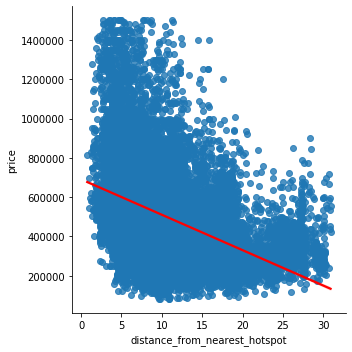

In [145]:
sns.lmplot(x='distance_from_nearest_hotspot', y='price', data=df, line_kws={'color': 'red'})

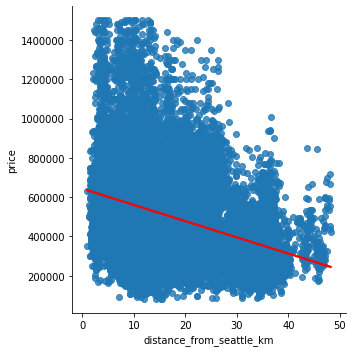

In [146]:
sns.lmplot(x='distance_from_seattle_km', y='price', data=df, line_kws={'color': 'red'})